In [ ]:
!pip install scikit-multilearn==0.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 8.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import hamming_loss, accuracy_score, confusion_matrix, multilabel_confusion_matrix

from transformers import AutoTokenizer


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_l1_eng= pd.read_csv('/content/train_en_l1.csv')
df_l1_eng





,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6
0,"This is our history . For Shia and Sunni ,...",question_1,NaN,NaN,NaN,NaN,NaN,0.0
1,"If this is ""grilling"" then wht wud u call t...",question_1,NaN,NaN,NaN,1.0,NaN,NaN
2,look at <handle replaced>madam. Locals attac...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
3,our beloved yogi ji has given money home and...,question_1,NaN,NaN,NaN,NaN,1.0,NaN
4,"""I gonna kill that bitch"" Bitvj imma kill you...",question_1,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
6526,“mama let’s research” bitch suck my dick 😭,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",question_1,0.0,1.0,1.0,0.0,NaN,NaN


In [ ]:
df_l1_test= pd.read_csv('/content/test_en_l1.csv')
df_l1_test

,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6
0,"""who's this tweet about"" bitch it's about you ...",question_1,NaN,0.0,NaN,NaN,0.0,1.0
1,#AlkaLamba should’ve used her slippers to slap...,question_1,0.0,0.0,NaN,0.0,NaN,NaN
2,#CoronaVillains #COVIDIDIOT #COVID2019 is a...,question_1,NaN,NaN,1.0,NaN,1.0,1.0
3,"(Acts 29:19994) LIKE the female ""governors"" of...",question_1,NaN,1.0,1.0,NaN,1.0,NaN
4,***Let us celebrate “secular” as a beautiful w...,question_1,NaN,0.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
1102,you should be tired of not having any kind of ...,question_1,0.0,NaN,1.0,NaN,NaN,1.0
1103,“The limits of tyrants are prescribed by the e...,question_1,0.0,NaN,0.0,NaN,0.0,NaN
1104,♋️🦀 like wtf my symbol is 69 and I’m a crab an...,question_1,NaN,NaN,0.0,NaN,0.0,1.0
1105,"🇺🇸: marry a millionaire guy, divorce get half ...",question_1,NaN,NaN,1.0,NaN,1.0,1.0


In [ ]:
df_l3= pd.read_csv('/content/train_en_l3.csv')
df_l3

,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6
0,"This is our history . For Shia and Sunni ,...",question_3,NaN,NaN,NaN,NaN,NaN,0.0
1,"If this is ""grilling"" then wht wud u call t...",question_3,NaN,NaN,NaN,1.0,NaN,NaN
2,look at <handle replaced>madam. Locals attac...,question_3,NaN,NaN,NaN,NaN,0.0,NaN
3,our beloved yogi ji has given money home and...,question_3,NaN,NaN,NaN,NaN,1.0,NaN
4,"""I gonna kill that bitch"" Bitvj imma kill you...",question_3,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
6526,“mama let’s research” bitch suck my dick 😭,question_3,NaN,NaN,NaN,NaN,0.0,NaN
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,question_3,NaN,NaN,NaN,NaN,0.0,NaN
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,question_3,NaN,NaN,NaN,NaN,0.0,NaN
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",question_3,0.0,1.0,1.0,0.0,NaN,NaN


In [ ]:
df_l3_test= pd.read_csv('/content/test_en_l3.csv')
df_l3_test

,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6
0,"""who's this tweet about"" bitch it's about you ...",question_3,NaN,0.0,NaN,NaN,0.0,1.0
1,#AlkaLamba should’ve used her slippers to slap...,question_3,0.0,0.0,NaN,0.0,NaN,NaN
2,#CoronaVillains #COVIDIDIOT #COVID2019 is a...,question_3,NaN,NaN,1.0,NaN,1.0,1.0
3,"(Acts 29:19994) LIKE the female ""governors"" of...",question_3,NaN,1.0,1.0,NaN,1.0,NaN
4,***Let us celebrate “secular” as a beautiful w...,question_3,NaN,0.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
1102,you should be tired of not having any kind of ...,question_3,0.0,NaN,1.0,NaN,NaN,1.0
1103,“The limits of tyrants are prescribed by the e...,question_3,0.0,NaN,0.0,NaN,0.0,NaN
1104,♋️🦀 like wtf my symbol is 69 and I’m a crab an...,question_3,NaN,NaN,0.0,NaN,0.0,1.0
1105,"🇺🇸: marry a millionaire guy, divorce get half ...",question_3,NaN,NaN,1.0,NaN,1.0,1.0


In [ ]:
annotation_cols = ['en_a1', 'en_a2', 'en_a3', 'en_a4', 'en_a5', 'en_a6']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            # Try converting to float
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            # Ignore non-numeric or missing values
            continue

    if not valid_votes:
        return None

    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)

    return 1 if ones >= zeros else 0  # Favors 1 in a tie



In [ ]:
# Apply to DataFrame
df_l1['label_1'] = df_l1[annotation_cols].apply(get_majority_label, axis=1)
df_l1

,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6,label_1
0,"This is our history . For Shia and Sunni ,...",question_1,NaN,NaN,NaN,NaN,NaN,0.0,0
1,"If this is ""grilling"" then wht wud u call t...",question_1,NaN,NaN,NaN,1.0,NaN,NaN,1
2,look at <handle replaced>madam. Locals attac...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
3,our beloved yogi ji has given money home and...,question_1,NaN,NaN,NaN,NaN,1.0,NaN,1
4,"""I gonna kill that bitch"" Bitvj imma kill you...",question_1,NaN,NaN,NaN,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...
6526,“mama let’s research” bitch suck my dick 😭,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",question_1,0.0,1.0,1.0,0.0,NaN,NaN,1


In [ ]:
df_l1_test['label_1'] = df_l1_test[annotation_cols].apply(get_majority_label, axis=1)
df_l1_test

,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6,label_1
0,"""who's this tweet about"" bitch it's about you ...",question_1,NaN,0.0,NaN,NaN,0.0,1.0,0
1,#AlkaLamba should’ve used her slippers to slap...,question_1,0.0,0.0,NaN,0.0,NaN,NaN,0
2,#CoronaVillains #COVIDIDIOT #COVID2019 is a...,question_1,NaN,NaN,1.0,NaN,1.0,1.0,1
3,"(Acts 29:19994) LIKE the female ""governors"" of...",question_1,NaN,1.0,1.0,NaN,1.0,NaN,1
4,***Let us celebrate “secular” as a beautiful w...,question_1,NaN,0.0,1.0,0.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
1102,you should be tired of not having any kind of ...,question_1,0.0,NaN,1.0,NaN,NaN,1.0,1
1103,“The limits of tyrants are prescribed by the e...,question_1,0.0,NaN,0.0,NaN,0.0,NaN,0
1104,♋️🦀 like wtf my symbol is 69 and I’m a crab an...,question_1,NaN,NaN,0.0,NaN,0.0,1.0,0
1105,"🇺🇸: marry a millionaire guy, divorce get half ...",question_1,NaN,NaN,1.0,NaN,1.0,1.0,1


In [ ]:
# Apply to DataFrame
df_l3['label_3'] = df_l3[annotation_cols].apply(get_majority_label, axis=1)
df_l3

,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6,label_3
0,"This is our history . For Shia and Sunni ,...",question_3,NaN,NaN,NaN,NaN,NaN,0.0,0
1,"If this is ""grilling"" then wht wud u call t...",question_3,NaN,NaN,NaN,1.0,NaN,NaN,1
2,look at <handle replaced>madam. Locals attac...,question_3,NaN,NaN,NaN,NaN,0.0,NaN,0
3,our beloved yogi ji has given money home and...,question_3,NaN,NaN,NaN,NaN,1.0,NaN,1
4,"""I gonna kill that bitch"" Bitvj imma kill you...",question_3,NaN,NaN,NaN,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...
6526,“mama let’s research” bitch suck my dick 😭,question_3,NaN,NaN,NaN,NaN,0.0,NaN,0
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,question_3,NaN,NaN,NaN,NaN,0.0,NaN,0
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,question_3,NaN,NaN,NaN,NaN,0.0,NaN,0
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",question_3,0.0,1.0,1.0,0.0,NaN,NaN,1


In [ ]:
df_l3_test['label_3'] = df_l3_test[annotation_cols].apply(get_majority_label, axis=1)
df_l3_test

,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6,label_1,label_3
0,"""who's this tweet about"" bitch it's about you ...",question_3,NaN,0.0,NaN,NaN,0.0,1.0,0,0
1,#AlkaLamba should’ve used her slippers to slap...,question_3,0.0,0.0,NaN,0.0,NaN,NaN,0,0
2,#CoronaVillains #COVIDIDIOT #COVID2019 is a...,question_3,NaN,NaN,1.0,NaN,1.0,1.0,1,1
3,"(Acts 29:19994) LIKE the female ""governors"" of...",question_3,NaN,1.0,1.0,NaN,1.0,NaN,1,1
4,***Let us celebrate “secular” as a beautiful w...,question_3,NaN,0.0,1.0,0.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...
1102,you should be tired of not having any kind of ...,question_3,0.0,NaN,1.0,NaN,NaN,1.0,1,1
1103,“The limits of tyrants are prescribed by the e...,question_3,0.0,NaN,0.0,NaN,0.0,NaN,0,0
1104,♋️🦀 like wtf my symbol is 69 and I’m a crab an...,question_3,NaN,NaN,0.0,NaN,0.0,1.0,0,0
1105,"🇺🇸: marry a millionaire guy, divorce get half ...",question_3,NaN,NaN,1.0,NaN,1.0,1.0,1,1


In [ ]:
# Combine directly assuming same text order
df = pd.DataFrame({
    'text': df_l1['text'],
    'label_1': df_l1['label_1'],
    'label_3': df_l3['label_3']
})

# Convert to int
df['label_1'] = df['label_1'].astype(int)
df['label_3'] = df['label_3'].astype(int)

# Preview
print(df.head())
print(df.shape)


                                                text  label_1  label_3
0      This is our history . For Shia and Sunni ,...        0        0
1     If this is "grilling" then wht wud u call t...        1        1
2    look at <handle replaced>madam. Locals attac...        0        0
3    our beloved yogi ji has given money home and...        1        1
4  "I gonna kill that bitch"  Bitvj imma kill you...        1        1
(6531, 3)


In [ ]:
# Combine directly assuming same text order
df_test = pd.DataFrame({
    'text': df_l1_test['text'],
    'label_1': df_l1_test['label_1'],
    'label_3': df_l3_test['label_3']
})

# Convert to int
df_test['label_1'] = df_test['label_1'].astype(int)
df_test['label_3'] = df_test['label_3'].astype(int)

# Preview
print(df_test.head())
print(df_test.shape)


                                                text  label_1  label_3
0  "who's this tweet about" bitch it's about you ...        0        0
1  #AlkaLamba should’ve used her slippers to slap...        0        0
2  #CoronaVillains  #COVIDIDIOT   #COVID2019 is a...        1        1
3  (Acts 29:19994) LIKE the female "governors" of...        1        1
4  ***Let us celebrate “secular” as a beautiful w...        0        0
(1107, 3)


In [ ]:
df.head(85)

,text,label_1,label_3
0,"This is our history . For Shia and Sunni ,...",0,0
1,"If this is ""grilling"" then wht wud u call t...",1,1
2,look at <handle replaced>madam. Locals attac...,0,0
3,our beloved yogi ji has given money home and...,1,1
4,"""I gonna kill that bitch"" Bitvj imma kill you...",1,1
...,...,...,...
80,<handle replaced> I come from a normal family ...,0,0
81,<handle replaced> Jai hind. We support CAA. ...,0,1
82,<handle replaced> Just saw few clips of u figh...,1,1
83,<handle replaced> Just saw few clips of ur big...,0,0


In [ ]:
import re
def normalize_text(text):
    text = str(text).lower()
    text = re.sub(r'<handle replaced>', '[USER]', text)       # Replace user handles
    text = re.sub(r'https?://\S+|www\.\S+', '', text)          # Remove URLs
    text = re.sub(r'<.*?>', '', text)                          # Remove any other HTML tags
    text = re.sub(r'\s+', ' ', text).strip()                   # Normalize whitespace
    return text

In [ ]:
df['text'] = df['text'].apply(normalize_text)
df


,text,label_1,label_3
0,"this is our history . for shia and sunni , don...",0,0
1,"if this is ""grilling"" then wht wud u call th s...",1,1
2,look at [user]madam. locals attacked. no relig...,0,0
3,our beloved yogi ji has given money home and f...,1,1
4,"""i gonna kill that bitch"" bitvj imma kill you ...",1,1
...,...,...,...
6526,“mama let’s research” bitch suck my dick 😭,0,0
6527,😂😂😂😂 i was by myself and it was her and her bi...,0,0
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch im c...,0,0
6529,"😎""boys only luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",1,1


In [ ]:
df_test['text'] = df_test['text'].apply(normalize_text)
df_test


,text,label_1,label_3
0,"""who's this tweet about"" bitch it's about you ...",0,0
1,#alkalamba should’ve used her slippers to slap...,0,0
2,#coronavillains #covididiot #covid2019 is a #p...,1,1
3,"(acts 29:19994) like the female ""governors"" of...",1,1
4,***let us celebrate “secular” as a beautiful w...,0,0
...,...,...,...
1102,you should be tired of not having any kind of ...,1,1
1103,“the limits of tyrants are prescribed by the e...,0,0
1104,♋️🦀 like wtf my symbol is 69 and i’m a crab an...,0,0
1105,"🇺🇸: marry a millionaire guy, divorce get half ...",1,1


In [ ]:
from sklearn.model_selection import train_test_split

# Create a helper column to stratify on both labels
df['label_combo'] = df['label_1'].astype(str) + '_' + df['label_3'].astype(str)

# Stratified train-validation split
train_df, val_df = train_test_split(
    df,
    test_size=0.15,
    random_state=42,
    stratify=df['label_combo']
)

# Drop the helper column from splits
train_df = train_df.drop(columns='label_combo')
val_df = val_df.drop(columns='label_combo')

# Optional: show split sizes
print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")


Train size: 5551
Validation size: 980


In [ ]:
train_df.head(100)

,text,label_1,label_3
1614,[user][user]this propaganda won't work this ti...,0,1
5113,[user]ji wish you very happy birthday 🎂🎉 lord ...,0,0
2596,[user]getting mental strength from your #worth...,0,0
5050,[user]hey happy b day have fun enjoy my sis bo...,0,0
750,[user][user][user]so #covid19 is the biggest c...,0,0
...,...,...,...
5950,my post office manager 🤣🤣 stupid bitch,1,1
3150,[user]it's u only baby,0,0
3122,[user]it fell down just like democracy. simple. 🙅,0,1
6511,y’all bitches be weird fr,1,1


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch.nn as nn
import torch

# Load pretrained IndicBERT
MODEL_NAME = "ai4bharat/indic-bert"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
base_model = AutoModel.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/135M [00:00<?, ?B/s]

In [ ]:
from torch.utils.data import Dataset

class MultiTaskDataset(Dataset):
    def __init__(self, texts, label1, label3, tokenizer, max_len=128):
        self.texts = texts
        self.label1 = label1
        self.label3 = label3
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label_1': torch.tensor(self.label1[idx], dtype=torch.float),
            'label_3': torch.tensor(self.label3[idx], dtype=torch.float)
        }


In [ ]:
from torch.utils.data import DataLoader

def create_dataloaders(train_df, val_df, tokenizer, batch_size=16):
    train_dataset = MultiTaskDataset(
        train_df['text'].tolist(),
        train_df['label_1'].tolist(),
        train_df['label_3'].tolist(),
        tokenizer
    )
    val_dataset = MultiTaskDataset(
        val_df['text'].tolist(),
        val_df['label_1'].tolist(),
        val_df['label_3'].tolist(),
        tokenizer
    )

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    return train_loader, val_loader


In [ ]:
from torch.utils.data import DataLoader

def create_test_loader(test_df, tokenizer, batch_size=16):
    test_dataset = MultiTaskDataset(
        test_df['text'].tolist(),
        test_df['label_1'].tolist(),
        test_df['label_3'].tolist(),
        tokenizer
    )

    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    return test_loader


In [ ]:
class MultiTaskIndicBERT(nn.Module):
    def __init__(self, base_model):
        super(MultiTaskIndicBERT, self).__init__()
        self.bert = base_model
        hidden_size = self.bert.config.hidden_size

        self.dropout = nn.Dropout(0.3)

        # Task-specific heads
        self.classifier_1 = nn.Linear(hidden_size, 1)  # For label_1
        self.classifier_3 = nn.Linear(hidden_size, 1)  # For label_3

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = self.dropout(outputs.last_hidden_state[:, 0, :])  # [CLS] token

        out_1 = torch.sigmoid(self.classifier_1(cls_output))
        out_3 = torch.sigmoid(self.classifier_3(cls_output))

        return out_1.squeeze(-1), out_3.squeeze(-1)


In [ ]:
from torch.optim import AdamW
from torch.nn import BCELoss

import matplotlib.pyplot as plt
import torch.nn as nn
import torch

def train_model(
    model, train_loader, val_loader, epochs=5, lr=5e-6, device='cuda',
    save_path="best_model.pt"
):
    model = model.to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
    loss_fn = nn.BCELoss()

    best_val_loss = float('inf')
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # ------- TRAINING -------
        model.train()
        running_train_loss = 0

        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            label_1 = batch['label_1'].to(device)
            label_3 = batch['label_3'].to(device)

            optimizer.zero_grad()
            out_1, out_3 = model(input_ids, attention_mask)

            loss_1 = loss_fn(out_1, label_1)
            loss_3 = loss_fn(out_3, label_3)
            loss = loss_1 + loss_3

            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()

        avg_train_loss = running_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # ------- VALIDATION -------
        model.eval()
        running_val_loss = 0

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                label_1 = batch['label_1'].to(device)
                label_3 = batch['label_3'].to(device)

                out_1, out_3 = model(input_ids, attention_mask)

                loss_1 = loss_fn(out_1, label_1)
                loss_3 = loss_fn(out_3, label_3)
                loss = loss_1 + loss_3

                running_val_loss += loss.item()

        avg_val_loss = running_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f} - Val Loss: {avg_val_loss:.4f}")

        # Save the best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), save_path)
            print(f"✅ Saved new best model at epoch {epoch+1}")

    # ------- PLOT LOSSES -------
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()



Epoch 1/5 - Train Loss: 1.1982 - Val Loss: 1.1145
✅ Saved new best model at epoch 1
Epoch 2/5 - Train Loss: 1.0654 - Val Loss: 1.0542
✅ Saved new best model at epoch 2
Epoch 3/5 - Train Loss: 0.9958 - Val Loss: 1.0308
✅ Saved new best model at epoch 3
Epoch 4/5 - Train Loss: 0.9598 - Val Loss: 1.0292
✅ Saved new best model at epoch 4
Epoch 5/5 - Train Loss: 0.9087 - Val Loss: 1.0146
✅ Saved new best model at epoch 5


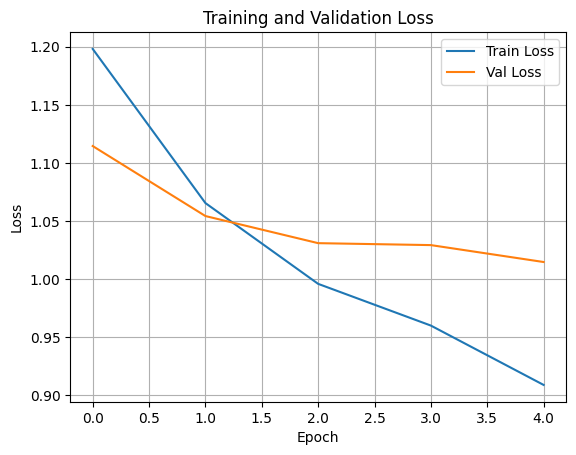

In [ ]:
# Create loaders
train_loader, val_loader = create_dataloaders(train_df, val_df, tokenizer)

# Initialize model
model = MultiTaskIndicBERT(base_model)

# Train
train_model(model, train_loader, val_loader)

In [ ]:
from sklearn.metrics import f1_score

def evaluate_model(model, data_loader, device='cuda'):
    model.eval()
    y_true_1 = []
    y_pred_1 = []

    y_true_3 = []
    y_pred_3 = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            label_1 = batch['label_1'].to(device)
            label_3 = batch['label_3'].to(device)

            out_1, out_3 = model(input_ids, attention_mask)

            # Convert probs to binary predictions
            pred_1 = (out_1 > 0.5).int().cpu().numpy()
            pred_3 = (out_3 > 0.5).int().cpu().numpy()

            y_true_1.extend(label_1.cpu().numpy())
            y_pred_1.extend(pred_1)


            y_true_3.extend(label_3.cpu().numpy())
            y_pred_3.extend(pred_3)

    # Compute F1
    # print(y_pred_1)
    # print(y_pred_3)
    f1_1 = f1_score(y_true_1, y_pred_1, average='macro')
    f1_3 = f1_score(y_true_3, y_pred_3, average='macro')

    print(f"Macro F1-score for Label 1 (gendered abuse): {f1_1:.4f}")
    print(f"Macro F1-score for Label 3 (explicit content): {f1_3:.4f}")
    return f1_1, f1_3


In [ ]:
evaluate_model(model, val_loader, device='cuda')

Macro F1-score for Label 1 (gendered abuse): 0.5056
Macro F1-score for Label 3 (explicit content): 0.6462


(0.505605244650104, 0.6461533042130477)

In [ ]:
test_loader = create_test_loader(df_test,tokenizer)
evaluate_model(model, test_loader, device='cuda')


Macro F1-score for Label 1 (gendered abuse): 0.4860
Macro F1-score for Label 3 (explicit content): 0.6754


(0.4859551934826884, 0.6753956631714135)

In [ ]:
df_eng = pd.read_csv('/content/english_dataset.tsv', sep='\t')

df_eng

,text_id,text,task_1,task_2,task_3
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,NOT,NONE,NONE
1,hasoc_en_2,@politico No. We should remember very clearly ...,HOF,HATE,TIN
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,NOT,NONE,NONE
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,NOT,NONE,NONE
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,NOT,NONE,NONE
...,...,...,...,...,...
5847,hasoc_en_5848,"@davidfrum @trueblueusa1 That's cute and all, ...",HOF,PRFN,UNT
5848,hasoc_en_5849,a recession issa comin' #maga #magamyass #fuck...,NOT,NONE,NONE
5849,hasoc_en_5850,#DoctorsFightBack Will 'The Mad n Irrational ...,HOF,OFFN,TIN
5850,hasoc_en_5851,#ShiningIndia #educatedindia or more like RUND...,HOF,OFFN,UNT


In [ ]:
# Drop unwanted columns
df_eng = df_eng.drop(columns=['text_id','task_2', 'task_3'])

# Rename the main label column
df_eng = df_eng.rename(columns={'task_1': 'label_1'})

# Map label values
label_map = {'NOT': 0, 'HOF': 1}
df_eng['label_1'] = df_eng['label_1'].map(label_map)
df_eng

,text,label_1
0,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,0
1,@politico No. We should remember very clearly ...,1
2,@cricketworldcup Guess who would be the winner...,0
3,Corbyn is too politically intellectual for #Bo...,0
4,All the best to #TeamIndia for another swimmin...,0
...,...,...
5847,"@davidfrum @trueblueusa1 That's cute and all, ...",1
5848,a recession issa comin' #maga #magamyass #fuck...,0
5849,#DoctorsFightBack Will 'The Mad n Irrational ...,1
5850,#ShiningIndia #educatedindia or more like RUND...,1
